<a href="https://colab.research.google.com/github/rosacarla/treinamento-triplo-de-RNC/blob/main/Treinamento_RNT_train_s22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # TREINAMENTO DE REDE NEURAL TEMPORAL - RNT - TREINO
> CURSO: TECNOLOGIA EM INTELIGÊNCIA ARTIFICIAL APLICADA  
> DISCIPLINA: REDES NEURAIS  
> PROFESSOR: LUCAS EMANUEL SILVA E OLIVEIRA  
> ESTUDANTE: CARLA EDILA SILVEIRA  
> <p align='justify'>OBJETIVO: treinar a rede RNT para fazer previsões sobre uma base de dados relacionada à cotação do dólar (em reais), dentro de determinado período de tempo.<p/>  
> DATA: 20/09/2023</br>
> </br>
<img src='https://i.postimg.cc/MK6W61Gm/real-dolar.png' width=980 height=312>


In [ ]:
# IMPORTAÇÃO DE BIBLIOTECAS

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
# MONTAGEM DO DRIVE PARA CARREGAR DADOS

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# CONFIGURAÇÃO DO ENDEREÇO DOS ARQUIVOS

# INSERIR O CAMINHO DO ARQUIVO DE TREINAMENTO
# Caminho no desktop: 'C:/RN/dolar_treinamento_S8.csv'

arquivo_treinamento = '/content/gdrive/MyDrive/RN/dolar_treinamento_S8.csv'

In [ ]:
# Visualização do conteúdo do arquivo 'dolar_treinamento_S8.csv'

csvFile1 = pd.read_csv(arquivo_treinamento)

print(csvFile1)

      Data     Dolar
0        0  2.869664
1        1  2.586966
2        2  2.542516
3        3  2.642932
4        4  2.869664
...    ...       ...
1090  1090  5.374475
1091  1091  5.291933
1092  1092  5.274115
1093  1093  5.115508
1094  1094  5.047292

[1095 rows x 2 columns]


In [ ]:
# DEFINIÇÃO DA JANELA DE PREVISÃO PARA A REDE NEURAL TEMPORAL

janela_prev = 10

In [ ]:
# DEFINIÇÃO DA FUNÇÃO DE PERDA (FUNÇÃO CUSTO) E OTIMIZADOR

# OPCOES DE FUNCAO DE PERDA
# mean_squared_error
# mean_absolute_error
# categorical_crossentropy
# binary_crossentropy

funcao_perda = 'binary_crossentropy'

# OPCOES DE OTIMIZADORES
# sgd
# adam
# RMSprop

otimizador = 'RMSprop'

In [ ]:
# DEFINIÇÃO DO NÚMERO DE NEURÔNIOS DA CAMADA LSTM E DA CAMADA DENSA

# Quantidade de neuronios da Camada LSTM
neuronios_LSTM = 14

# Quantidade de neuronios da Camada Densa
neuronios_densa = 20

In [ ]:
# DEFINIÇÃO DO NÚMERO DE ÉPOCAS E TAMANHO DO LOTE DE TREINAMENTO PARA CADA ÉPOCA

epocas = 200

lote = 50

In [ ]:
# CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS

# Leitura do arquivo CSV de treinamento
train_df = pd.read_csv(arquivo_treinamento)

# Filtra apenas coluna 'Valor' nos dados de treinamento
train_data = train_df[['Dolar']].values

# Normaliza dados de treinamento entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)

In [ ]:
# Visualização dos 5 último registros do dataframe de treino

train_df.tail()

,Data,Dolar
1090,1090,5.374475
1091,1091,5.291933
1092,1092,5.274115
1093,1093,5.115508
1094,1094,5.047292


In [ ]:
# PRÉ-PROCESSAMENTO DO CONJUNTO DE DADOS DE ACORDO COM A JANELA DE TEMPO

# Função auxiliar para criar conjuntos de dados com base na janela de tempo
def create_dataset(dataset, window_size=1):
    X, Y = [], []
    for i in range(len(dataset) - window_size):
        window = dataset[i:(i + window_size), 0]
        X.append(window)
        Y.append(dataset[i + window_size, 0])
    return np.array(X), np.array(Y)

# Criação de conjuntos de treinamento e teste
X_train, y_train = create_dataset(train_data_scaled, janela_prev)

# Reshape de dados para formato esperado pela LSTM [amostras, janela de tempo, características]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# CRIAÇÃO DO MODELO DA REDE NEURAL TEMPORAL

# Cria modelo da rede neural
model = Sequential()
model.add(LSTM(neuronios_LSTM, input_shape=(janela_prev, 1)))
model.add(Dense(neuronios_densa))
model.compile(loss=funcao_perda, optimizer=otimizador)

In [ ]:
# TREINAMENTO DA REDE NEURAL TEMPORAL

# Treina o modelo
model.fit(X_train, y_train, epochs=epocas, batch_size=lote, verbose=1)

Epoch 1/200
22/22 [==============================] - 2s 6ms/step - loss: 2.4788
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 2.3456
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 2.2872
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 2.1547
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 2.0341
Epoch 6/200
22/22 [==============================] - 0s 4ms/step - loss: 2.0234
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 2.0195
Epoch 8/200
22/22 [==============================] - 0s 4ms/step - loss: 1.8333
Epoch 9/200
22/22 [==============================] - 0s 4ms/step - loss: 1.6029
Epoch 10/200
22/22 [==============================] - 0s 4ms/step - loss: 1.5768
Epoch 11/200
22/22 [==============================] - 0s 4ms/step - loss: 1.5621
Epoch 12/200
22/22 [==============================] - 0s 4ms/step - loss: 1.4445
Epoch 13/200
22/22 [=================

In [ ]:
# PREVISÕES DO MODELO

# Fazer previsoes
train_predict = model.predict(X_train)

34/34 [==============================] - 0s 1ms/step


In [ ]:
# SALVAR MODELO TREINADO

# Salva modelo treinado no Drive (ou desktop)
# Caminho para salvae no desktop:'C:/RN/S8_RNT_treinada.h5'

model.save('/content/gdrive/MyDrive/RN/S8_RNT_treinada.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# PÓS-PROCESSAMENTO DOS DADOS

# Desfaz normalizacao dos dados
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

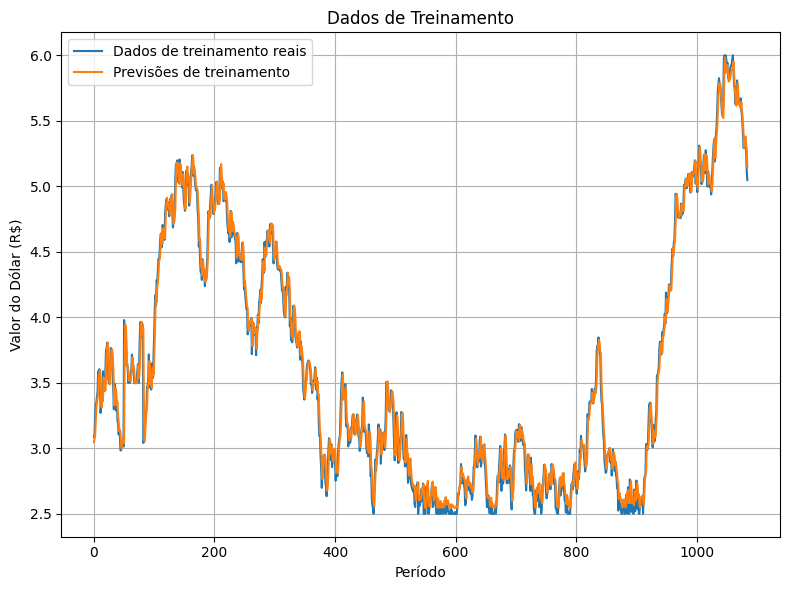

In [ ]:
# APRESENTAÇÃO GRÁFICA DOS RESULTADOS

# Plota resultado em uma grafico
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))

# Grafico: Dados de treinamento
ax1.plot(y_train[0], label='Dados de treinamento reais')
ax1.plot(train_predict[:, 0], label='Previsões de treinamento')
ax1.legend()
ax1.set_title('Dados de Treinamento')
ax1.set_xlabel('Período')
ax1.set_ylabel('Valor do Dólar (R$)')
ax1.grid(True)

# Ajusta espaçamento entre subplots
plt.tight_layout()

# Exibe graficos
plt.show()

In [ ]:
# APRESENTAÇÃO DAS MÉTRICAS DE DESEMPENHO

mse_train = mean_squared_error(y_train[0], train_predict[:, 0])

print('\n' + '=' * 70)
print("\n Erro Médio Quadrático (MSE) - Treinamento: {:.4f}".format(mse_train))
print('\n')

mae_train = mean_absolute_error(y_train[0], train_predict[:, 0])

print('=' * 70)
print("\nErro Médio Absoluto (MAE) - Treinamento: {:.4f}".format(mae_train))
print('\n')

r2_train = r2_score(y_train[0], train_predict[:, 0])

print('=' * 70)
print("\n Coeficiente de Determinação (R²) - Treinamento: {:.4f}".format(r2_train))
print('\n' + '=' * 70)



 Erro Médio Quadrático (MSE) - Treinamento: 0.0111



Erro Médio Absoluto (MAE) - Treinamento: 0.0802



 Coeficiente de Determinação (R²) - Treinamento: 0.9879



> # RESULTADOS DOS TREINAMENTOS COM AJUSTES DE PARÂMETROS NUMÉRICOS  
> <p align='justify'>Destacaram-se na cor <font color="aqua">azul</font> os parâmetros ajustados em cada execução a seguir descrita, para observação dos resultados apresentados depois do treinamento do modelo.</p>

> <b>1a. execução (com a configuração inicial do código)</b>  
> Parâmetros:  
> - funcao_perda = 'binary_crossentropy'
> - otimizador = 'RMSprop'
> - neuronios_LSTM = 5
> - neuronios_densa = 50
> - epocas = 3
> - lote = 100</br>  
> <img src='https://i.postimg.cc/zGNf43L9/1exe-rnt-som2.png'></br>  

> <b>2a. execução</b>  
> Parâmetros:  
> - funcao_perda = 'mean_squared_error'
> - otimizador = 'adam'
> - neuronios_LSTM = 4
> - neuronios_densa = 10
> - epocas = 30
> - lote = 30</br>  
> <img src='https://i.postimg.cc/HncbVjdp/2exe-rnt-som2.png'></br>  

> <b>3a. execução</b>  
> Parâmetros:  
> - funcao_perda = 'mean_absolute_error'  
> - otimizador = 'adam'  
> - neuronios_LSTM = 16  
> - neuronios_densa = 24  
> - epocas = 20  
> - lote = 20</br>  
> <img src='https://i.postimg.cc/DZyVGJj3/3exe-rnt-som2.png'></br>  

> <b>4a. execução</b>  
> Parâmetros:  
> - funcao_perda = 'mean_absolute_error'
> - otimizador = 'sgd'
> - neuronios_LSTM = 14
> - neuronios_densa = 20
> - epocas = 200
> - lote = 50</br>   
> <img src='https://i.postimg.cc/tJg7TgQB/6exe-rnt-som3.png'>  
  
> <b>5a. execução</b>  
> Parâmetros:  
> - funcao_perda = 'binary_crossentropy'
> - otimizador = 'adam'
> - neuronios_LSTM = 14
> - neuronios_densa = 20
> - epocas = 100
> - lote = 50</br>  
> <img src='https://i.postimg.cc/DzDv7cfY/4exe-rnt-som2.png'></br>

> <b>6a. execução</b>  
> Parâmetros:  
> - funcao_perda = 'binary_crossentropy'
> - otimizador = 'RMSprop'
> - neuronios_LSTM = 14
> - neuronios_densa = 20
> - epocas = 200
> - lote = 50</br>  
> <img src='https://i.postimg.cc/cJmn42t4/6exe-rnt-som3.png'></br>



